##Installation

In [1]:
# Step 1: Install Condacolab to set up Miniconda
!pip install -q condacolab
import condacolab
condacolab.install()
# Note: This installation will reset the session.
# IMPORTANT: There should be two separate cells. After the reset, please run the following cell.
# If you try to run all the cells at once, the session reset will interrupt the process and prevent the next cell from running.

✨🍰✨ Everything looks OK!


In [2]:
# Step 2: Create a Conda environment (in this case called "SDAL") with Python 3.10 and activate it
!conda create -n SDAL python=3.10 -y
!source /usr/local/etc/profile.d/conda.sh && conda activate SDAL

# Step 3: Install ROOT 6.28.104 in the Conda SDAL environment
!conda install -c conda-forge root=6.28.10 -y

# Step 4
import os
os.environ["PATH"] = "/usr/local/envs/SDAL/bin:" + os.environ["PATH"]
os.environ["PYTHONPATH"] = "/usr/local/envs/SDAL/lib/python3.10/site-packages"


Streaming output truncated to the last 5000 lines.

                                                                        











                                                                        












                                                                        













                                                                        
Preparing transaction: - \ done
Verifying transaction: / - \ | / - \ | / - \ | / - \ | done
Executing transaction: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
#
# To activate this environment, use
#
#     $ conda activate SDAL
#
# To deactivate an active environment, use
#
#     $ conda deactivate

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / up

##START HERE


In [3]:
import ROOT
print(ROOT.gROOT.GetVersion())

Welcome to JupyROOT 6.28/10
6.28/10


In [4]:
import math

## **Just for 1 example**

We define a function which calculates an efficiency as a ratio between successes and trials (passed over total) and also the correct uncertainty on it which is the binomial error. In other words, the following function computes the binomial uncertainty "manually".

In [5]:
def binomial_error(passed, total):
    eff = passed / total  #  (Efficiency)
    error = math.sqrt((eff * (1 - eff)) / total)  # Binomial error
    return eff, error


Let's proceed with a numerical exercise:

In [6]:
list_passed = [0, 1, 3, 6, 10, 14, 17, 18, 19, 20]
list_total = [20] * 10

manual_graph = ROOT.TGraphAsymmErrors()

for i in range(10):
    passed = list_passed[i]
    total = list_total[i]
    eff, sigma = binomial_error(passed, total)

    manual_graph.SetPoint(i, i + 1 + 0.1, eff)
    manual_graph.SetPointError(i, 0, 0, sigma, sigma)  # ±sigma symmetrical

# this will be used later
manual_graph.SetMarkerStyle(25)
manual_graph.SetMarkerColor(ROOT.kGreen)
manual_graph.SetLineColor(ROOT.kGreen)
manual_graph.SetMarkerStyle(24)  # open circle
manual_graph.SetMarkerSize(2.0)
manual_graph.SetLineWidth(6)
manual_graph.SetLineStyle(3)  # Dotted



CL (eff_cp - kFCP): 0.682689492137
CL (eff_normal - kFNormal): 0.682689492137


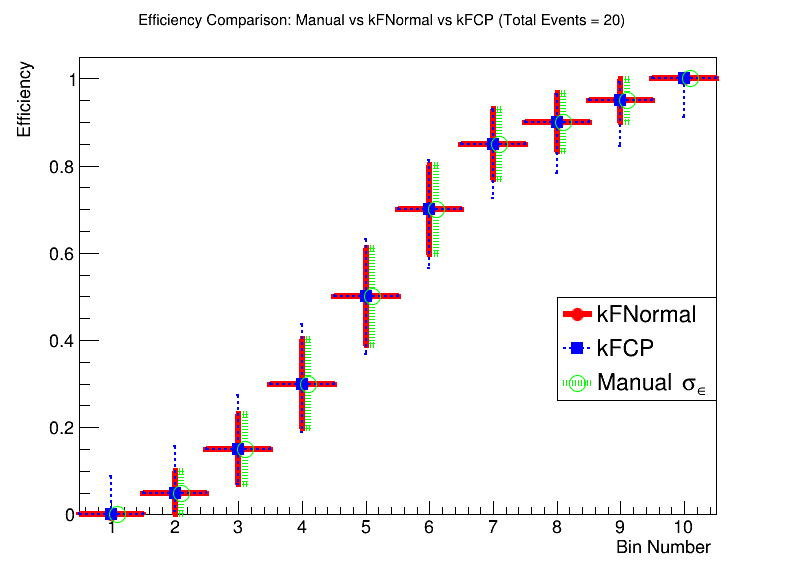

In [7]:
canvas_1 = ROOT.TCanvas("canvas_1", "Comparison of Methods", 800, 600)
frame = ROOT.TH1F("frame", "", 10, 0.5, 10.5)
frame.SetMinimum(0)
frame.SetMaximum(1.05)
frame.SetTitle("Efficiency Comparison: Manual vs kFNormal vs kFCP (Total Events = 20);Bin Number;Efficiency")
frame.SetStats(0)
frame.Draw()

# We introduce the histograms that will fill with the two lists; we will take then the ratio (passed / total)
hist_total = ROOT.TH1F("hist_total", "Total Events", 10, 0.5, 10.5)
hist_passed = ROOT.TH1F("hist_passed", "Passed Events", 10, 0.5, 10.5)

for i in range(10):
    hist_total.SetBinContent(i + 1, list_total[i])
    hist_passed.SetBinContent(i + 1, list_passed[i])

## When using TEfficiency the binomial error is still calculated as we have done manually above;
## however the uncertainty to apply is calculated as a confidence interval in two ways:
## 1) in the "gaussiam approximation" the binomial error is treated symmetrically
## 2) in the Clopper-Pearson asymmetric errors (this is the recommended more sophisticated procedure)

if ROOT.TEfficiency.CheckConsistency(hist_passed, hist_total):  # checking that numerator < = denominator

    eff_cp = ROOT.TEfficiency(hist_passed, hist_total)
    eff_cp.SetStatisticOption(ROOT.TEfficiency.kFCP)       # Clopper-Pearson

    eff_normal = ROOT.TEfficiency(hist_passed, hist_total)
    eff_normal.SetStatisticOption(ROOT.TEfficiency.kFNormal)  # "gaussian approx"
    #eff_normal.SetConfidenceLevel(0.683)                     # this it the default i.e. no need to explicit it

    print("CL (eff_cp - kFCP):", eff_cp.GetConfidenceLevel())
    print("CL (eff_normal - kFNormal):", eff_normal.GetConfidenceLevel())

else:
    print("Histograms are inconsistent. Cannot create TEfficiency.")

eff_normal.SetMarkerColor(ROOT.kRed)
eff_normal.SetLineColor(ROOT.kRed)
eff_normal.SetMarkerStyle(20)  # filled circle
eff_normal.SetMarkerSize(1.5)
eff_normal.SetLineWidth(6)
eff_normal.SetLineStyle(1)  # Solid

eff_cp.SetMarkerColor(ROOT.kBlue)
eff_cp.SetLineColor(ROOT.kBlue)
eff_cp.SetMarkerStyle(21)      # square
eff_cp.SetMarkerSize(1.5)
eff_cp.SetLineWidth(2)
eff_cp.SetLineStyle(2)      # Dashed

eff_normal.Draw("P SAME")
eff_cp.Draw("P SAME")
manual_graph.Draw("P SAME")

# Legend
legend_1 = ROOT.TLegend(0.7, 0.3, 0.90, 0.48)
legend_1.AddEntry(eff_normal, "kFNormal", "lp")
legend_1.AddEntry(eff_cp, "kFCP", "lp")
legend_1.AddEntry(manual_graph, "Manual #sigma_{#epsilon}", "lp")
legend_1.Draw()

canvas_1.Update()
canvas_1.Draw()


In [8]:
print(f"{'Bin':^5} | {'Eff':^8} | {'kFCP -':^8} | {'kFCP +':^8} | {'kFNorm':^8} | {'Manual -':^9} | {'Manual +':^9}")
print("-" * 73)

for i in range(1, 11):
    eff = eff_normal.GetEfficiency(i)

    # kFCP
    err_cp_low = eff_cp.GetEfficiencyErrorLow(i)
    err_cp_up  = eff_cp.GetEfficiencyErrorUp(i)

    # kFNormal
    err_norm = eff_normal.GetEfficiencyErrorLow(i)

    # Manual
    passed = list_passed[i - 1]
    total = list_total[i - 1]
    eff_manual, sigma_manual = binomial_error(passed, total)
    err_manual_low = sigma_manual
    err_manual_up = sigma_manual

    print(f"{i:^5} | {eff_manual:^8.4f} | {err_cp_low:^8.4f} | {err_cp_up:^8.4f} | ±{err_norm:^7.4f} | -{err_manual_low:^8.4f} | +{err_manual_up:^7.4f}")


 Bin  |   Eff    |  kFCP -  |  kFCP +  |  kFNorm  | Manual -  | Manual + 
-------------------------------------------------------------------------
  1   |  0.0000  |  0.0000  |  0.0879  | ±0.0000  | - 0.0000  | +0.0000 
  2   |  0.0500  |  0.0414  |  0.1058  | ±0.0487  | - 0.0487  | +0.0487 
  3   |  0.1500  |  0.0805  |  0.1247  | ±0.0798  | - 0.0798  | +0.0798 
  4   |  0.3000  |  0.1119  |  0.1359  | ±0.1025  | - 0.1025  | +0.1025 
  5   |  0.5000  |  0.1327  |  0.1327  | ±0.1118  | - 0.1118  | +0.1118 
  6   |  0.7000  |  0.1359  |  0.1119  | ±0.1025  | - 0.1025  | +0.1025 
  7   |  0.8500  |  0.1247  |  0.0805  | ±0.0798  | - 0.0798  | +0.0798 
  8   |  0.9000  |  0.1170  |  0.0643  | ±0.0671  | - 0.0671  | +0.0671 
  9   |  0.9500  |  0.1058  |  0.0414  | ±0.0487  | - 0.0487  | +0.0487 
 10   |  1.0000  |  0.0879  |  0.0000  | ±0.0000  | - 0.0000  | +0.0000 


## **All examples**

**Sigma to Confidence Level Table Generator**

The following code generates a table that maps selected **sigma (z)** values to their corresponding **confidence levels (CL)** for both **one-tailed** and **two-tailed** interpretations, based on the standard normal distribution. The resulting table is printed to the screen and also saved to a text file named:

```
sigma_to_confidence_table.txt
```

---

**How It Works**

The script uses the cumulative distribution function (CDF) from the `scipy.stats.norm` module to calculate probabilities for a standard normal distribution.

Mathematically, the CDF is expressed as:

$$
\Phi(z) = P(Z < z)
$$

---

**Confidence Level Formulas**

1. **One-Tailed Confidence Level**:

This corresponds to the probability of observing a value less than \( z \) under the standard normal curve:

$$
CL_{\text{one-tail}} = \Phi(z)
$$

2. **Two-Tailed Confidence Level**:

This represents the probability of a value falling within the symmetric interval \( [-z, +z] \), and is calculated as:

$$
CL_{\text{two-tail}} = 2 \cdot \Phi(z) - 1
$$

---

**Relevance to TEfficiency**

ROOT’s `TEfficiency` class, by default, interprets the confidence level as a **two-tailed** interval. For instance, setting:

```python
eff.SetConfidenceLevel(0.683)
```

results in approximately a **1σ (sigma)** interval under the two-tailed assumption:

 $$ z = 1 \Rightarrow CL_{\text{two-tail}} \approx 68.3\% $$

To obtain 2σ or 3σ intervals, the corresponding values of confidence level should be approximately 95.45% and 99.73%, respectively.

---

**Table Output**

Each row of the output table includes:
- The sigma value (z)
- Its corresponding one-tailed CL in percent
- Its corresponding two-tailed CL in percent

This table can be used to convert between sigma values and confidence levels.


In [ ]:
from scipy.stats import norm

# List of z (sigma) values
z_values = [0.500, 0.674, 1.000, 1.282, 1.645, 1.960, 2.000, 2.326, 2.576, 3.000]

# Prepare file
with open("sigma_to_confidence_table.txt", "w") as f:
    header = f"{'Sigma (z)':<10} | {'One-Tailed CL (%)':<20} | {'Two-Tailed CL (%)':<20}"
    separator = "-" * len(header)

    print(header)
    print(separator)
    f.write(header + "\n")
    f.write(separator + "\n")

    for z in z_values:
        one_tailed_cl = norm.cdf(z)         # P(Z < z)
        two_tailed_cl = 2 * one_tailed_cl - 1  # 2 * P(Z < z) - 1
        row = f"{z:<10.3f} | {one_tailed_cl * 100:<20.5f} | {two_tailed_cl * 100:<20.5f}"

        print(row)
        f.write(row + "\n")


Sigma (z)  | One-Tailed CL (%)    | Two-Tailed CL (%)   
--------------------------------------------------------
0.500      | 69.14625             | 38.29249            
0.674      | 74.98443             | 49.96887            
1.000      | 84.13447             | 68.26895            
1.282      | 90.00787             | 80.01574            
1.645      | 95.00151             | 90.00302            
1.960      | 97.50021             | 95.00042            
2.000      | 97.72499             | 95.44997            
2.326      | 98.99907             | 97.99814            
2.576      | 99.50025             | 99.00049            
3.000      | 99.86501             | 99.73002            


**PyROOT: Sigma to Confidence Level Table**

The following PyROOT code computes and displays the relationship between **standard deviation (sigma, or z)** and the corresponding **confidence level (CL)** under a standard normal distribution. It uses ROOT's internal math utilities and stores the output in:

```
sigma_to_confidence_table_pyroot.txt
```

---

**How It Works**

This version uses ROOT’s `Math.normal_cdf(z)` function to compute the **cumulative distribution function (CDF)** of the standard normal distribution.

Mathematically:

$$
\Phi(z) = P(Z < z)
$$

In PyROOT, this is evaluated using `ROOT::Math::normal_cdf(z)`.


---

**Confidence Level Calculations**

1. **One-Tailed Confidence Level**:

$$
CL_{\text{one-tail}} = \Phi(z)
$$

2. **Two-Tailed Confidence Level**:

$$
CL_{\text{two-tail}} = 2 \cdot \Phi(z) - 1
$$

This formula gives the total probability of a standard normal variable falling in the interval \( [-z, z] \).

---

**Application in TEfficiency**

In the context of `ROOT.TEfficiency`, the **confidence level (CL)** is interpreted as a **two-tailed** confidence interval. That means if:

```cpp
eff->SetConfidenceLevel(0.683);
```

then you are working at approximately **1σ** confidence level.

Typical sigma and two-tailed CL relationships are:

- $ z = 1 \Rightarrow CL \approx 68.27\% $
- $ z = 2 \Rightarrow CL \approx 95.45\% $
- $ z = 3 \Rightarrow CL \approx 99.73\% $

---

**Table Output**

The script prints and saves a table with three columns:
- **Sigma (z)**
- **One-Tailed CL (%)**
- **Two-Tailed CL (%)**

This table helps translate between z-scores and confidence levels using PyROOT tools.


In [ ]:
from ROOT import Math

# Sigma (z) values
z_values = [0.500, 0.674, 1.000, 1.282, 1.645, 1.960, 2.000, 2.326, 2.576, 3.000]

# Prepare table
output_lines = []
header = f"{'Sigma (z)':<10} | {'One-Tailed CL (%)':<20} | {'Two-Tailed CL (%)':<20}"
separator = "-" * len(header)
output_lines.append(header)
output_lines.append(separator)

for z in z_values:
    one_tailed = Math.normal_cdf(z)
    two_tailed = 2 * one_tailed - 1
    line = f"{z:<10.3f} | {one_tailed * 100:<20.5f} | {two_tailed * 100:<20.5f}"
    output_lines.append(line)

# Save to text file
with open("sigma_to_confidence_table_pyroot.txt", "w") as f:
    for line in output_lines:
        f.write(line + "\n")

# Print to console
for line in output_lines:
    print(line)


Sigma (z)  | One-Tailed CL (%)    | Two-Tailed CL (%)   
--------------------------------------------------------
0.500      | 69.14625             | 38.29249            
0.674      | 74.98443             | 49.96887            
1.000      | 84.13447             | 68.26895            
1.282      | 90.00787             | 80.01574            
1.645      | 95.00151             | 90.00302            
1.960      | 97.50021             | 95.00042            
2.000      | 97.72499             | 95.44997            
2.326      | 98.99907             | 97.99814            
2.576      | 99.50025             | 99.00049            
3.000      | 99.86501             | 99.73002            


We want now to explore the efficiency uncertainty as a function of the number of total counts and understand when the gaussian approximation confidence interval is close or far from the Clopper-Pearson "exact" Confidence Interval

In [12]:
import ROOT
import math
import csv

# Lists for two different total event cases
list_10_passed = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10]
list_20_passed = [0, 1, 3, 6, 10, 14, 17, 18, 19, 20]
list_100_passed = [0, 5, 15, 30, 50, 70, 85, 90, 95, 100]

list_10_total = [10] * 10
list_20_total = [20] * 10
list_100_total = [100] * 10

# Binomial error calculator
def binomial_error(passed, total):
    eff = passed / total
    error = math.sqrt(eff * (1 - eff) / total) if total > 0 else 0
    return eff, error
"""
def binomial_error(passed, total, cl=0.6827):  # Varsayılan: ±1σ ≈ %68.27
    eff = passed / total
    sigma = math.sqrt(eff * (1 - eff) / total)

    # Calculate z-score according to wanted CL (two-tailed)
    alpha = 1 - cl
    z = norm.ppf(1 - alpha / 2)  # Two-tailed

    error = z * sigma
    return eff, error
"""

# Efficiency graph builder
def make_eff_graphs(passed_list, total_list, label_shift=0.0):
    manual = ROOT.TGraphAsymmErrors()
    total_hist = ROOT.TH1F("", "", 10, 0.5, 10.5)
    passed_hist = ROOT.TH1F("", "", 10, 0.5, 10.5)

    for i in range(10):
        x_val = i + 1 + label_shift
        passed = passed_list[i]
        total = total_list[i]
        eff, err = binomial_error(passed, total)

        manual.SetPoint(i, x_val, eff) # X shifted
        manual.SetPointError(i, 0, 0, err, err)
        total_hist.SetBinContent(i + 1, total)
        passed_hist.SetBinContent(i + 1, passed)

    # Manual graph style
    manual.SetMarkerStyle(24)
    manual.SetMarkerColor(ROOT.kGreen)
    manual.SetLineColor(ROOT.kGreen)
    manual.SetMarkerSize(2.0)
    manual.SetLineWidth(2)
    manual.SetLineStyle(3)


    # TEfficiencies
    if not ROOT.TEfficiency.CheckConsistency(passed_hist, total_hist):
        print("Inconsistent histograms.")
        return None, None, None

    eff_cp = ROOT.TEfficiency(passed_hist, total_hist)
    eff_cp.SetStatisticOption(ROOT.TEfficiency.kFCP)
    #eff_cp.SetConfidenceLevel(0.683) # kFCP default value
    # --- we can change to a value taken by the "two-sided" column in previous table

    eff_norm = ROOT.TEfficiency(passed_hist, total_hist)
    eff_norm.SetStatisticOption(ROOT.TEfficiency.kFNormal)
    #eff_norm.SetConfidenceLevel(0.683) # kFNormal default value
    # --- we can change to a value taken by the "two-sided" column in previous table

    #print("CL (eff_cp - kFCP):", eff_cp.GetConfidenceLevel())
    #print("CL (eff_normal - kFNormal):", eff_norm.GetConfidenceLevel())

    return eff_cp, eff_norm, manual

# Drawing function
def draw_efficiency_canvas(eff_cp, eff_norm, manual_graph, title, filename):
    canvas = ROOT.TCanvas(f"canvas_{filename}", title, 800, 600)
    frame = ROOT.TH1F("frame", "", 10, 0.5, 10.5)
    frame.SetMinimum(0)
    frame.SetMaximum(1.05)
    frame.SetStats(0)
    frame.SetTitle(title + ";Bin Number;Efficiency")
    frame.Draw()

    # kFNormal style
    eff_norm.SetLineColor(ROOT.kRed)
    eff_norm.SetMarkerColor(ROOT.kRed)
    eff_norm.SetMarkerStyle(20)
    eff_norm.SetMarkerSize(1.5)
    eff_norm.SetLineWidth(2)
    eff_norm.SetLineStyle(1)
    eff_norm.Draw("P SAME")

    # kFCP style
    eff_cp.SetLineColor(ROOT.kBlue)
    eff_cp.SetMarkerColor(ROOT.kBlue)
    eff_cp.SetMarkerStyle(21)
    eff_cp.SetMarkerSize(1.5)
    eff_cp.SetLineWidth(2)
    eff_cp.SetLineStyle(2)
    eff_cp.Draw("P SAME")

    manual_graph.Draw("P SAME")

    legend = ROOT.TLegend(0.7, 0.25, 0.9, 0.45)
    legend.AddEntry(eff_norm, "kFNormal", "lp")
    legend.AddEntry(eff_cp, "kFCP", "lp")
    legend.AddEntry(manual_graph, "Manual #sigma_{#epsilon}", "lp")
    legend.Draw()

    canvas.Update()
    #canvas.Draw()
    canvas.SaveAs(f"{filename}.png")
    # In Jupyter notebooks, direct canvas.Draw() calls
    # may not render all elements properly (e.g., axes, titles, legends).
    # Instead, we save the canvas as an image and explicitly display it
    # to ensure accurate rendering within the notebook environment:

    from IPython.display import display, Image
    display(Image(filename=f"{filename}.png"))
    return canvas

def summarize_efficiencies(list_passed, list_total, eff_cp, eff_normal, output_csv=None):
    total_val = list_total[0] if all(x == list_total[0] for x in list_total) else "mixed"
    cl_cp = eff_cp.GetConfidenceLevel()
    cl_norm = eff_normal.GetConfidenceLevel()

    print(f"\nEfficiency Summary (Total = {total_val})")
    print(f"Confidence Level (kFCP): {cl_cp:.3f}")
    print(f"Confidence Level (kFNormal): {cl_norm:.3f}")
    print(f"{'Bin':^5} | {'Eff':^8} | {'kFCP -':^8} | {'kFCP +':^8} | {'kFNorm':^8} | {'Manual -':^9} | {'Manual +':^9}")
    print("-" * 73)

    summary_data = [[f"Efficiency Summary (Total = {total_val})"],
                    [f"Confidence Level (kFCP): {cl_cp:.3f}"],
                    [f"Confidence Level (kFNormal): {cl_norm:.3f}"],
                    [],
                    ["Bin", "Eff", "kFCP -", "kFCP +", "kFNorm", "Manual -", "Manual +"]]

    for i in range(1, 11):
        eff = eff_normal.GetEfficiency(i)
        err_cp_low = eff_cp.GetEfficiencyErrorLow(i)
        err_cp_up  = eff_cp.GetEfficiencyErrorUp(i)
        err_norm = eff_normal.GetEfficiencyErrorLow(i)

        passed = list_passed[i - 1]
        total = list_total[i - 1]
        eff_manual = passed / total if total > 0 else 0
        sigma_manual = (eff_manual * (1 - eff_manual) / total) ** 0.5 if total > 0 else 0

        print(f"{i:^5} | {eff_manual:^8.4f} | {err_cp_low:^8.4f} | {err_cp_up:^8.4f} | ±{err_norm:^7.4f} | -{sigma_manual:^8.4f} | +{sigma_manual:^7.4f}")

        summary_data.append([
            i,
            round(eff_manual, 4),
            round(err_cp_low, 4),
            round(err_cp_up, 4),
            round(err_norm, 4),
            round(sigma_manual, 4),
            round(sigma_manual, 4),
        ])

    if output_csv:
        with open(output_csv, mode="w", newline="") as file:
            writer = csv.writer(file)
            for row in summary_data:
                writer.writerow(row)

In [13]:
# Generate the graphs
eff_cp_10, eff_norm_10, manual_10 = make_eff_graphs(list_10_passed, list_10_total, label_shift=0.1)
eff_cp_20, eff_norm_20, manual_20 = make_eff_graphs(list_20_passed, list_20_total, label_shift=0.1)
eff_cp_100, eff_norm_100, manual_100 = make_eff_graphs(list_100_passed, list_100_total, label_shift=0.1)



In [14]:
summarize_efficiencies(
    list_passed=list_10_passed,
    list_total=list_10_total,
    eff_cp=eff_cp_10,
    eff_normal=eff_norm_10,
    output_csv="summary_10.csv"
)



Efficiency Summary (Total = 10)
Confidence Level (kFCP): 0.683
Confidence Level (kFNormal): 0.683
 Bin  |   Eff    |  kFCP -  |  kFCP +  |  kFNorm  | Manual -  | Manual + 
-------------------------------------------------------------------------
  1   |  0.0000  |  0.0000  |  0.1681  | ±0.0000  | - 0.0000  | +0.0000 
  2   |  0.1000  |  0.0829  |  0.1941  | ±0.0949  | - 0.0949  | +0.0949 
  3   |  0.2000  |  0.1280  |  0.2055  | ±0.1265  | - 0.1265  | +0.1265 
  4   |  0.4000  |  0.1800  |  0.2046  | ±0.1549  | - 0.1549  | +0.1549 
  5   |  0.5000  |  0.1952  |  0.1952  | ±0.1581  | - 0.1581  | +0.1581 
  6   |  0.6000  |  0.2046  |  0.1800  | ±0.1549  | - 0.1549  | +0.1549 
  7   |  0.7000  |  0.2083  |  0.1583  | ±0.1449  | - 0.1449  | +0.1449 
  8   |  0.8000  |  0.2055  |  0.1280  | ±0.1265  | - 0.1265  | +0.1265 
  9   |  0.9000  |  0.1941  |  0.0829  | ±0.0949  | - 0.0949  | +0.0949 
 10   |  1.0000  |  0.1681  |  0.0000  | ±0.0000  | - 0.0000  | +0.0000 


In [15]:
summarize_efficiencies(
    list_passed=list_20_passed,
    list_total=list_20_total,
    eff_cp=eff_cp_20,
    eff_normal=eff_norm_20,
    output_csv="summary_20.csv"
)



Efficiency Summary (Total = 20)
Confidence Level (kFCP): 0.683
Confidence Level (kFNormal): 0.683
 Bin  |   Eff    |  kFCP -  |  kFCP +  |  kFNorm  | Manual -  | Manual + 
-------------------------------------------------------------------------
  1   |  0.0000  |  0.0000  |  0.0879  | ±0.0000  | - 0.0000  | +0.0000 
  2   |  0.0500  |  0.0414  |  0.1058  | ±0.0487  | - 0.0487  | +0.0487 
  3   |  0.1500  |  0.0805  |  0.1247  | ±0.0798  | - 0.0798  | +0.0798 
  4   |  0.3000  |  0.1119  |  0.1359  | ±0.1025  | - 0.1025  | +0.1025 
  5   |  0.5000  |  0.1327  |  0.1327  | ±0.1118  | - 0.1118  | +0.1118 
  6   |  0.7000  |  0.1359  |  0.1119  | ±0.1025  | - 0.1025  | +0.1025 
  7   |  0.8500  |  0.1247  |  0.0805  | ±0.0798  | - 0.0798  | +0.0798 
  8   |  0.9000  |  0.1170  |  0.0643  | ±0.0671  | - 0.0671  | +0.0671 
  9   |  0.9500  |  0.1058  |  0.0414  | ±0.0487  | - 0.0487  | +0.0487 
 10   |  1.0000  |  0.0879  |  0.0000  | ±0.0000  | - 0.0000  | +0.0000 


In [16]:
summarize_efficiencies(
    list_passed=list_100_passed,
    list_total=list_100_total,
    eff_cp=eff_cp_100,
    eff_normal=eff_norm_100,
    output_csv="summary_100.csv"
)



Efficiency Summary (Total = 100)
Confidence Level (kFCP): 0.683
Confidence Level (kFNormal): 0.683
 Bin  |   Eff    |  kFCP -  |  kFCP +  |  kFNorm  | Manual -  | Manual + 
-------------------------------------------------------------------------
  1   |  0.0000  |  0.0000  |  0.0182  | ±0.0000  | - 0.0000  | +0.0000 
  2   |  0.0500  |  0.0214  |  0.0324  | ±0.0218  | - 0.0218  | +0.0218 
  3   |  0.1500  |  0.0366  |  0.0446  | ±0.0357  | - 0.0357  | +0.0357 
  4   |  0.3000  |  0.0484  |  0.0528  | ±0.0458  | - 0.0458  | +0.0458 
  5   |  0.5000  |  0.0547  |  0.0547  | ±0.0500  | - 0.0500  | +0.0500 
  6   |  0.7000  |  0.0528  |  0.0484  | ±0.0458  | - 0.0458  | +0.0458 
  7   |  0.8500  |  0.0446  |  0.0366  | ±0.0357  | - 0.0357  | +0.0357 
  8   |  0.9000  |  0.0396  |  0.0303  | ±0.0300  | - 0.0300  | +0.0300 
  9   |  0.9500  |  0.0324  |  0.0214  | ±0.0218  | - 0.0218  | +0.0218 
 10   |  1.0000  |  0.0182  |  0.0000  | ±0.0000  | - 0.0000  | +0.0000 


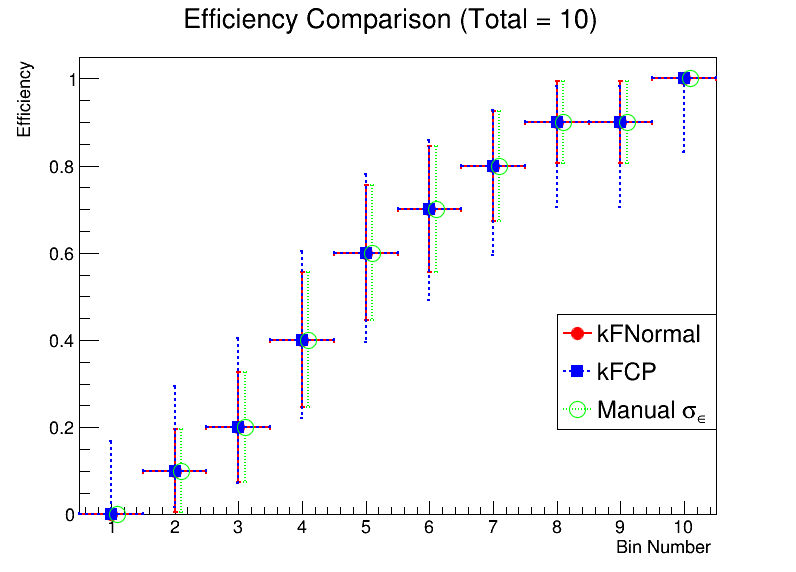

Info in <TCanvas::Print>: png file efficiency_10.png has been created


In [ ]:
# Draw and save separately
canvas_10 = draw_efficiency_canvas(eff_cp_10, eff_norm_10, manual_10, "Efficiency Comparison (Total = 10)", "efficiency_10")



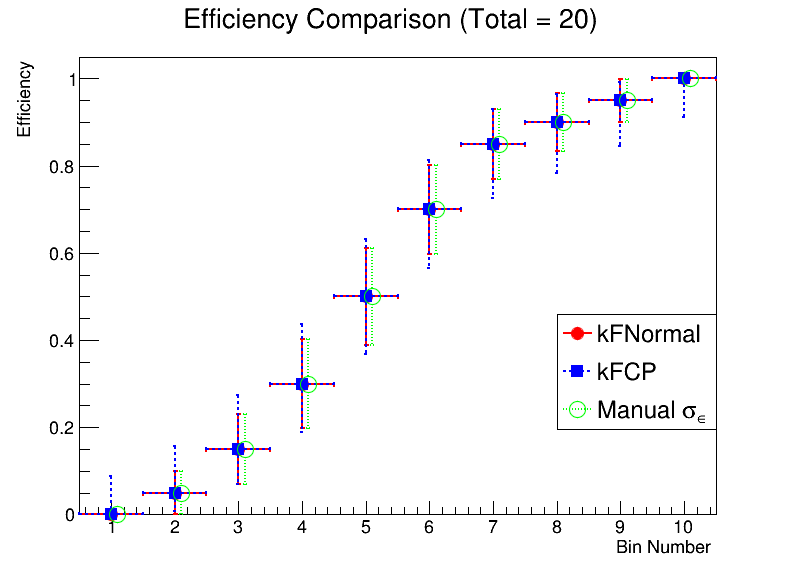

Info in <TCanvas::Print>: png file efficiency_20.png has been created


In [ ]:
canvas_20 = draw_efficiency_canvas(eff_cp_20, eff_norm_20, manual_20, "Efficiency Comparison (Total = 20)", "efficiency_20")



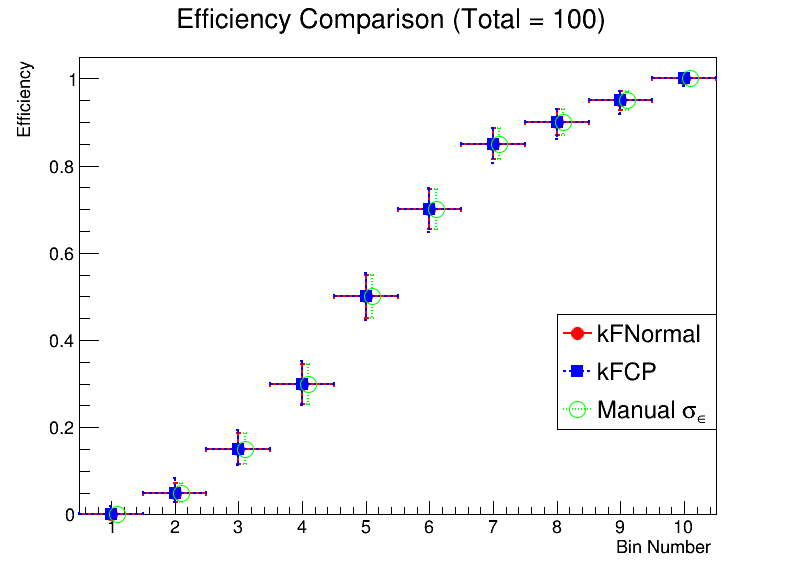

Info in <TCanvas::Print>: png file efficiency_100.png has been created


In [ ]:
canvas_100 = draw_efficiency_canvas(eff_cp_100, eff_norm_100, manual_100, "Efficiency Comparison (Total = 100)", "efficiency_100")


Info in <TCanvas::Print>: png file efficiency_comparison_all_totals.png has been created


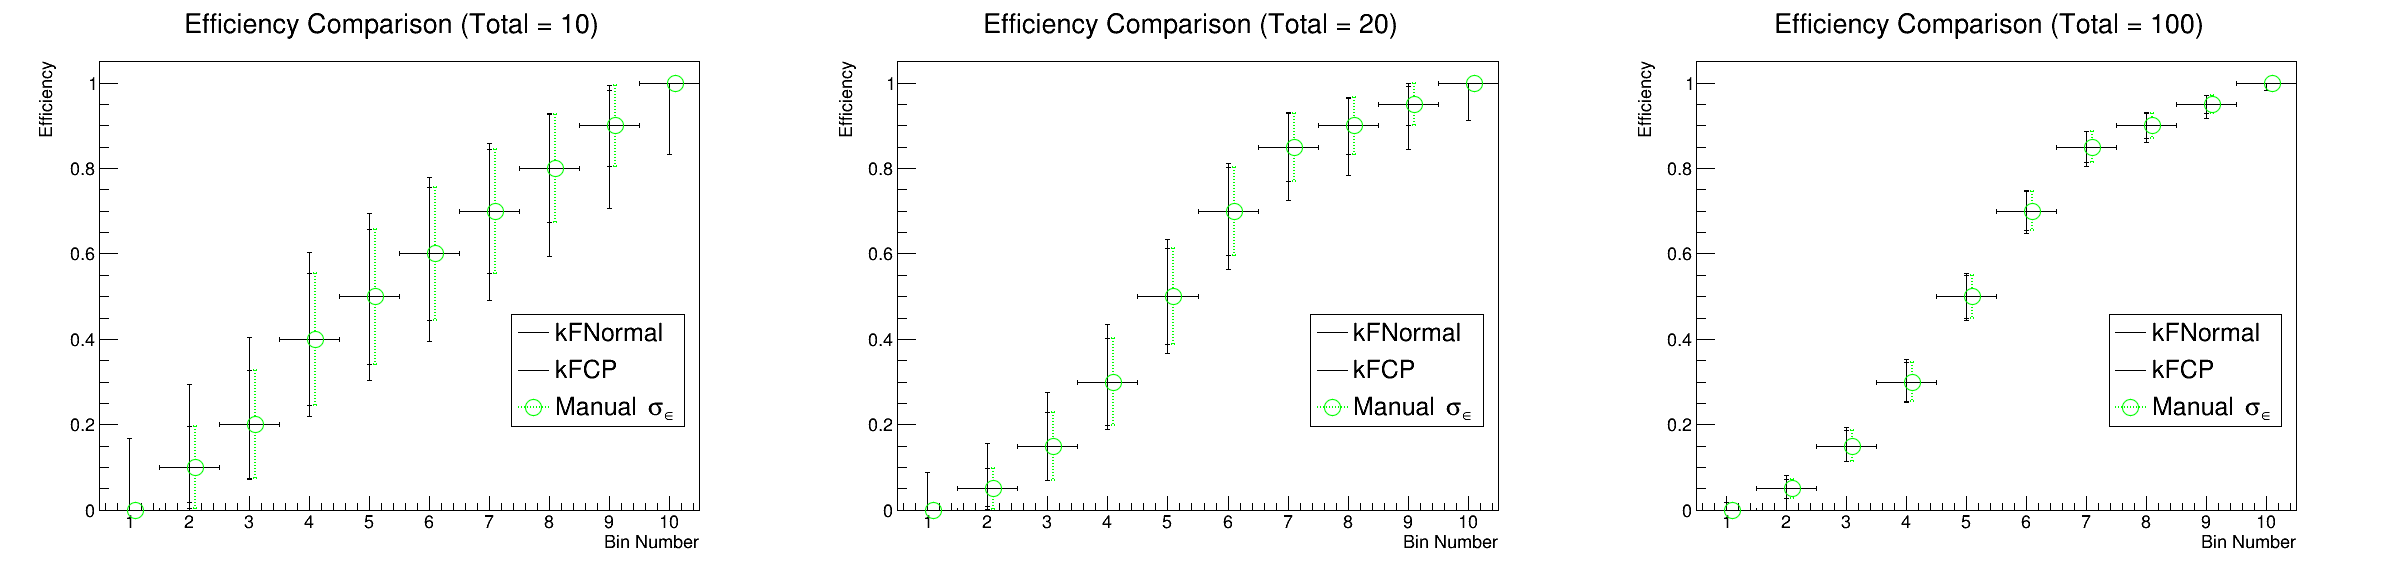

In [17]:
canvas_combined = ROOT.TCanvas("canvas_combined", "Combined Comparison", 2400, 600)
canvas_combined.Divide(3, 1)

# Panel 1: Total = 10
canvas_combined.cd(1)
frame_10 = ROOT.TH1F("frame_10", "", 10, 0.5, 10.5)
frame_10.SetMinimum(0)
frame_10.SetMaximum(1.05)
frame_10.SetTitle("Efficiency Comparison (Total = 10);Bin Number;Efficiency")
frame_10.SetStats(0)
frame_10.Draw()

eff_norm_10.Draw("P SAME")
eff_cp_10.Draw("P SAME")
manual_10.Draw("P SAME")

legend_10 = ROOT.TLegend(0.65, 0.25, 0.88, 0.45)
legend_10.AddEntry(eff_norm_10, "kFNormal", "lp")
legend_10.AddEntry(eff_cp_10, "kFCP", "lp")
legend_10.AddEntry(manual_10, "Manual #sigma_{#epsilon}", "lp")
legend_10.Draw()


# Panel 2: Total = 20
canvas_combined.cd(2)
frame_20 = ROOT.TH1F("frame_20", "", 10, 0.5, 10.5)
frame_20.SetMinimum(0)
frame_20.SetMaximum(1.05)
frame_20.SetTitle("Efficiency Comparison (Total = 20);Bin Number;Efficiency")
frame_20.SetStats(0)
frame_20.Draw()

eff_norm_20.Draw("P SAME")
eff_cp_20.Draw("P SAME")
manual_20.Draw("P SAME")

legend_20 = ROOT.TLegend(0.65, 0.25, 0.88, 0.45)
legend_20.AddEntry(eff_norm_20, "kFNormal", "lp")
legend_20.AddEntry(eff_cp_20, "kFCP", "lp")
legend_20.AddEntry(manual_20, "Manual #sigma_{#epsilon}", "lp")
legend_20.Draw()


# Panel 3: Total = 100
canvas_combined.cd(3)
frame_100 = ROOT.TH1F("frame_100", "", 10, 0.5, 10.5)
frame_100.SetMinimum(0)
frame_100.SetMaximum(1.05)
frame_100.SetTitle("Efficiency Comparison (Total = 100);Bin Number;Efficiency")
frame_100.SetStats(0)
frame_100.Draw()

eff_norm_100.Draw("P SAME")
eff_cp_100.Draw("P SAME")
manual_100.Draw("P SAME")

legend_100 = ROOT.TLegend(0.65, 0.25, 0.88, 0.45)
legend_100.AddEntry(eff_norm_100, "kFNormal", "lp")
legend_100.AddEntry(eff_cp_100, "kFCP", "lp")
legend_100.AddEntry(manual_100, "Manual #sigma_{#epsilon}", "lp")
legend_100.Draw()


# Final update and save
canvas_combined.Update()
canvas_combined.Draw()
canvas_combined.Print("efficiency_comparison_all_totals.png")
